In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [14]:
df = pd.read_csv(r"..\..\data\toydata\titanic.csv")
print(f"{df.shape}")
df.head(1)

(891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.25,S,Third,man,True,NaN,Southampton,no,False


In [31]:
df.value_counts("survived", dropna=False)

survived
0    549
1    342
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

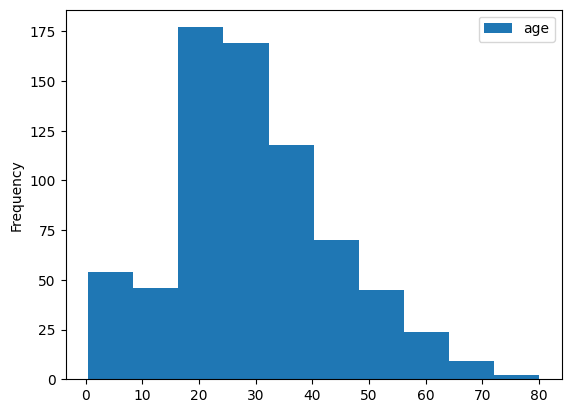

In [34]:
df.plot(kind="hist", y="age", bins=10,)

In [35]:
df.value_counts("age", dropna=False)

age
NaN      177
24.00     30
22.00     27
18.00     26
30.00     25
        ... 
24.50      1
0.67       1
0.92       1
36.50      1
0.42       1
Name: count, Length: 89, dtype: int64

In [32]:
df.value_counts("class", dropna=False)

class
Third     491
First     216
Second    184
Name: count, dtype: int64

In [33]:
df.value_counts("who", dropna=False)

who
man      537
woman    271
child     83
Name: count, dtype: int64

In [39]:
df = df.dropna(subset=["age"])
print(f"{df.shape}")
df.head(1)

(714, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.25,S,Third,man,True,NaN,Southampton,no,False


In [40]:
# Fit a GLM model
df["_class"] = df["class"]
model = smf.glm(formula='survived ~ age + _class + who', data=df, family=sm.families.Binomial()).fit()

# Print the model summary
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               survived   No. Observations:                  714
Model:                            GLM   Df Residuals:                      708
Model Family:                Binomial   Df Model:                            5
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -314.38
Date:                Mon, 29 Jul 2024   Deviance:                       628.76
Time:                        23:42:17   Pearson chi2:                     787.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3752
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            2.7546      0.383  

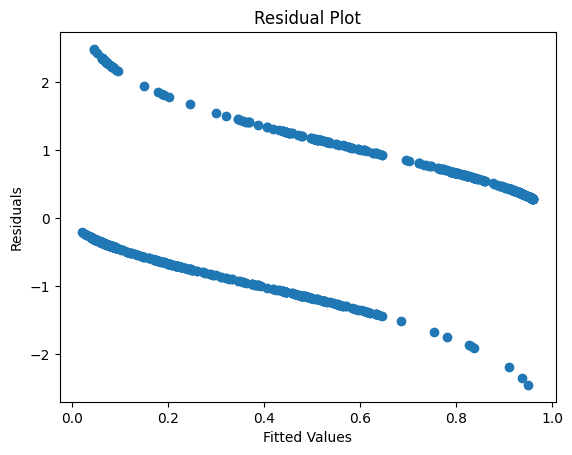

In [41]:
plt.scatter(model.fittedvalues, model.resid_deviance)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

<Axes: >

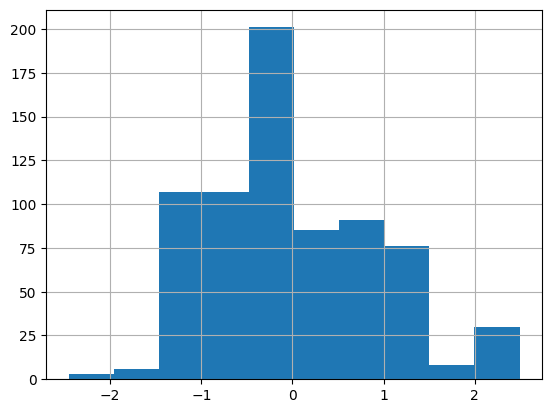

In [42]:
model.resid_deviance.hist()

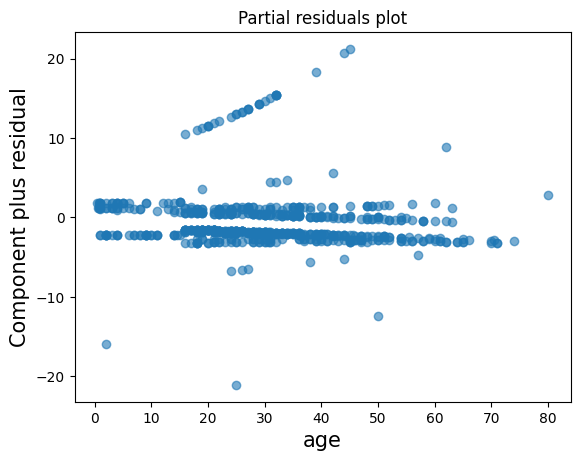

In [43]:
p = model.plot_partial_residuals('age')

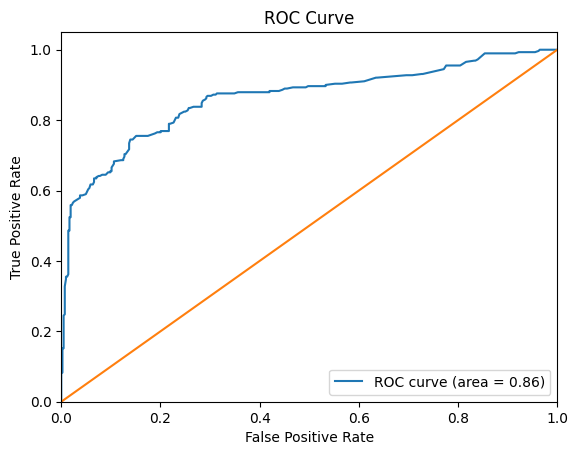

In [44]:
# roc curve
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(df["survived"], model.fittedvalues)
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()